# 사전 처리된 텍스트로 텍스트 분류

텐서플로 설치하기

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

#!pip install tf-nightly-2.0-preview
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.0.0-dev20191002


## IMDB 데이터 셋 다운받기

In [4]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
train_data.shape, test_data.shape

((25000,), (25000,))

## 데이터 탐색

In [5]:
print("훈련 샘플: {}, 레이블: {}".format(len(train_data), len(train_labels)))

훈련 샘플: 25000, 레이블: 25000


첫번째 데이터 확인하기

In [6]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [7]:
len(train_data[0]), len(train_data[1])

(218, 189)

### 정수를 다시 단어로 변환하기

In [7]:
# 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [8]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

## 데이터 준비

정수 배열의 길이가 모두 같도록 패딩(padding)을 추가해 `max_length * num_reviews` 크기의 정수 텐서를 만든다. 이 텐서는 신경망의 첫번쨰 층으로 활용할 수 있다.

In [9]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [10]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [11]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

## 모델 구성

In [33]:
# 입력 크기는 영화 리뷰 데이터셋에 적용된 어휘 사전의 크기입니다(10,000개의 단어)
vocab_size = 10000

## 드롭아웃 계층이 없는 모델
model_1 = keras.Sequential()
model_1.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model_1.add(keras.layers.GlobalAveragePooling1D())
model_1.add(keras.layers.Dense(16, activation='relu'))
model_1.add(keras.layers.Dense(1, activation='sigmoid'))

## 드롭아웃 계층의 가중치가 0.3인 모델
model_2 = keras.Sequential()
model_2.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model_2.add(keras.layers.GlobalAveragePooling1D())
model_2.add(keras.layers.Dropout(0.3))
model_2.add(keras.layers.Dense(16, activation='relu'))
model_2.add(keras.layers.Dropout(0.3))
model_2.add(keras.layers.Dense(1, activation='sigmoid'))

## 드롭아웃 계층의 가중치가 0.5인 모델
model_3 = keras.Sequential()
model_3.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model_3.add(keras.layers.GlobalAveragePooling1D())
model_3.add(keras.layers.Dropout(0.5))
model_3.add(keras.layers.Dense(16, activation='relu'))
model_3.add(keras.layers.Dropout(0.5))
model_3.add(keras.layers.Dense(1, activation='sigmoid'))

model_1.summary()
model_2.summary()
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 16)          160000    
__________________________

In [34]:
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 검증 세트 만들기

In [14]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [15]:
x_val.shape
partial_x_train.shape

(15000, 256)

## 모델 훈련

In [35]:
history_1 = model_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

history_2 = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

history_3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 129us/sample - loss: 0.6919 - accuracy: 0.5849 - val_loss: 0.6901 - val_accuracy: 0.6949
Epoch 2/40
15000/15000 [==============================] - 1s 76us/sample - loss: 0.6865 - accuracy: 0.7204 - val_loss: 0.6827 - val_accuracy: 0.7251
Epoch 3/40
15000/15000 [==============================] - 1s 82us/sample - loss: 0.6746 - accuracy: 0.7543 - val_loss: 0.6675 - val_accuracy: 0.7509
Epoch 4/40
15000/15000 [==============================] - 1s 83us/sample - loss: 0.6533 - accuracy: 0.7686 - val_loss: 0.6426 - val_accuracy: 0.7596
Epoch 5/40
15000/15000 [==============================] - 1s 78us/sample - loss: 0.6215 - accuracy: 0.7885 - val_loss: 0.6094 - val_accuracy: 0.7807
Epoch 6/40
15000/15000 [==============================] - 1s 76us/sample - loss: 0.5812 - accuracy: 0.8084 - val_loss: 0.5698 - val_accuracy: 0.7988
Epoch 7/40
15000/15000 [==============================]

15000/15000 [==============================] - 1s 93us/sample - loss: 0.3059 - accuracy: 0.8945 - val_loss: 0.3308 - val_accuracy: 0.8751
Epoch 16/40
15000/15000 [==============================] - 1s 86us/sample - loss: 0.2933 - accuracy: 0.8953 - val_loss: 0.3207 - val_accuracy: 0.8782
Epoch 17/40
15000/15000 [==============================] - 1s 93us/sample - loss: 0.2787 - accuracy: 0.9031 - val_loss: 0.3127 - val_accuracy: 0.8807
Epoch 18/40
15000/15000 [==============================] - 1s 97us/sample - loss: 0.2618 - accuracy: 0.9084 - val_loss: 0.3059 - val_accuracy: 0.8814
Epoch 19/40
15000/15000 [==============================] - 1s 79us/sample - loss: 0.2540 - accuracy: 0.9122 - val_loss: 0.3007 - val_accuracy: 0.8830
Epoch 20/40
15000/15000 [==============================] - 1s 78us/sample - loss: 0.2386 - accuracy: 0.9172 - val_loss: 0.2966 - val_accuracy: 0.8822
Epoch 21/40
15000/15000 [==============================] - 1s 82us/sample - loss: 0.2334 - accuracy: 0.9209 - va

15000/15000 [==============================] - 1s 84us/sample - loss: 0.2065 - accuracy: 0.9322 - val_loss: 0.2801 - val_accuracy: 0.8879
Epoch 30/40
15000/15000 [==============================] - 1s 90us/sample - loss: 0.1998 - accuracy: 0.9364 - val_loss: 0.2799 - val_accuracy: 0.8878
Epoch 31/40
15000/15000 [==============================] - 1s 96us/sample - loss: 0.1943 - accuracy: 0.9389 - val_loss: 0.2801 - val_accuracy: 0.8865
Epoch 32/40
15000/15000 [==============================] - 1s 76us/sample - loss: 0.1892 - accuracy: 0.9413 - val_loss: 0.2808 - val_accuracy: 0.8875
Epoch 33/40
15000/15000 [==============================] - 2s 130us/sample - loss: 0.1823 - accuracy: 0.9422 - val_loss: 0.2813 - val_accuracy: 0.8873
Epoch 34/40
15000/15000 [==============================] - 2s 101us/sample - loss: 0.1782 - accuracy: 0.9440 - val_loss: 0.2831 - val_accuracy: 0.8870
Epoch 35/40
15000/15000 [==============================] - 1s 74us/sample - loss: 0.1718 - accuracy: 0.9461 - 

## 모델 평가

In [44]:
result_1 = model_1.evaluate(test_data,  test_labels, verbose=2)
result_2 = model_2.evaluate(test_data,  test_labels, verbose=2)
result_3 = model_3.evaluate(test_data,  test_labels, verbose=2)

print(result_1)
print(result_2)
print(result_3)

25000/1 - 1s - loss: 0.3549 - accuracy: 0.8723
25000/1 - 1s - loss: 0.3191 - accuracy: 0.8754
25000/1 - 1s - loss: 0.2973 - accuracy: 0.8768
[0.3286289292526245, 0.87232]
[0.32080433918952944, 0.8754]
[0.31079408900260924, 0.87684]


## 정확도와 손실 그래프 그리기

In [45]:
history_dict_1 = history_1.history
history_dict_2 = history_2.history
history_dict_3 = history_3.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

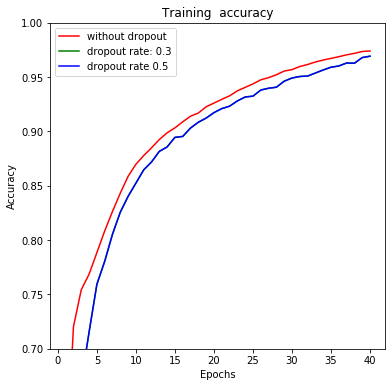

<Figure size 432x432 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt

acc_1 = history_dict_1['accuracy']
val_acc_1 = history_dict_1['val_accuracy']
loss_1 = history_dict_1['loss']
val_loss_1 = history_dict_1['val_loss']
acc_2 = history_dict_2['accuracy']
val_acc_2 = history_dict_2['val_accuracy']
loss_2 = history_dict_2['loss']
val_loss_2 = history_dict_2['val_loss']
acc_3 = history_dict_2['accuracy']
val_acc_3 = history_dict_2['val_accuracy']
loss_3 = history_dict_2['loss']
val_loss_3 = history_dict_2['val_loss']

epochs = range(1, len(acc_1) + 1)

# b는 "파란 실선"입니다
plt.plot(epochs, acc_1, 'r', label='without dropout')
plt.plot(epochs, acc_2, 'g', label='dropout rate: 0.3')
plt.plot(epochs, acc_3, 'b', label='dropout rate 0.5')
plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.ylim(0.7, 1.0)
plt.rcParams["figure.figsize"] = (6,6)
plt.show()
plt.clf() 

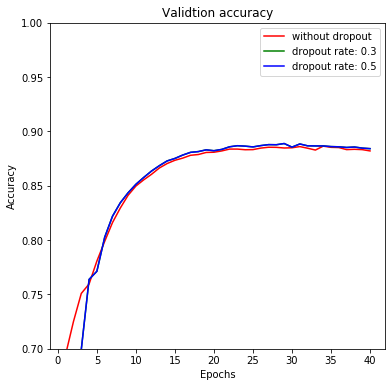

<Figure size 432x432 with 0 Axes>

In [52]:
# b는 "파란 실선"입니다
plt.plot(epochs, val_acc_1, 'r', label='without dropout')
plt.plot(epochs, val_acc_2, 'g', label='dropout rate: 0.3')
plt.plot(epochs, val_acc_3, 'b', label='dropout rate: 0.5')
plt.title('Validtion accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.ylim(0.7, 1.0)
plt.rcParams["figure.figsize"] = (6,6)
plt.show()
plt.clf() 

-->  결론: rate 0.5의 드롭아웃 계층을 가진 신경망이 오버피팅을 막고 0.6% 정도 더 높은 정확도를 가진다. 

피드백 
2진분류이므로 binary cross entrophy를 사용
embedding: 하나의 리뷰를 1만개의 데이터로(w2v)

nltk: 자연어처리 라이브러리
워드투벡터: 단어의 의미를 dense한 배열로 나타냄
w2v -> tsne(형태) -> k-means

1. 의사결정트리: 깊이를 다르게 하면서 실험(많은 데이터에 적합하지 않음)
    trian- > val과정을 거쳐가면서 매개변수를 다르게 하고 test data로 최종 결과 확인
    ->실험을 통해 하이퍼파라미터 조정, 다양한 모델로 이 과정을 거쳐서 결과 비교해보기
    feature importance: feature 정답에 기여한 정도
2. Logistic Regression
  confusoin metrix, 최종 모델을 가지고 결과 분석 필요(f1 스코어 등), statemodels